#Analytical Solutions to the Advection-Dispersion Equation

for a variety of initial and boundary conditions.

## Variables and Parameters

$m$ = mass released. Units of [mass].

$x,y,z$ = Spatial coordinates. Units of [length].

$x_0,y_0,z_0$ = Spatial coordinates of release location. Units of [length].

$x_{\star},y_{\star},z_{\star}$ = Downstream/Downwind coordinates of a location of interest. Units of [length].

$t$ = Time coordinate. Units of [time].

$c$ = Concentration. Units of [mass/volume].

$u_x$ = Advective Velocity in the x direction. We choose to orient our axes such that our velocity is in the x direction. Our approach only considers the simple case of a uniform flow in one direction. Units of [length/time].

$k$ = First order reaction rate coefficient. Units of [1/time].

$R$ = Retardation factor due to sorption in porous media. Unitless.

$D_x,D_y,D_z$ = Diffusivity or Dispersion coefficients. Units of [length^2/time]

>Molecular Diffusivity = Diffusion coefficient for Brownian motion of molecules.

>Effective Molecular Diffusivity = Diffusion coefficient for molecular diffusivity through porous media.

>Mechanical Dispersion Coeffiecient = Dispersion coefficient for differential advection through porous media.

>Hydrodyanmic Dispersion Coefficient = Mechanical Dispersion Coefficient + Effective Molecular Diffusivity.

>Turbulent Diffusivity (also known as Eddy Diffusivity) = Diffusion coefficient for turbulent motion of fluid parcels.

>Shear Dispersion Coefficient (also known as Taylor Dispersion Coefficient) = Dispersion coefficient for shear dispersion.

>Turbulent Dispersion Coefficient = Dispersion coefficient for turbulent dispersion (which can be thought of as a lot of shear dispersion).

>Mixing Coefficient = Molecular Diffusivity + Turbulent Diffusivity + Turbulent Dispersion Coefficient.

>NOTE: Groundwater flow through porous media is typically laminar. Almost all other types of environmental flows have the potential to be turbulent.

>NOTE: Turbulent Dispersion is typically much larger than Turbulent Diffusion. Turbulent Diffusion is typically much larger than Molecular Diffusion.


## Instantaneous Release

### Plane Source
Gov. Eqn:

> $\frac{dc}{dt} = -u_x \frac{dc}{dx} + D_x \frac{d^2c}{dx^2} - kc$

I.C.:

> $c_0(x) = M \delta (x-x_0)$ at t=0

> where $M$ = mass released per cross-sectional area

> $x_0$ = location of release

B.C.:

> $\lim_{x\to-\infty} c$ = $\lim_{x\to\infty} c=0$

Solution:

> $c(x,t) = \frac{M}{(4 \pi t)^\frac{1}{2}\sqrt{D_x}}e^{(-\frac{(x-x_0-u_xt)^2}{4D_xt})}e^{-kt}$

NOTE: If sorption is occuring in porous media, replace
>$u_x$ with $\frac{u_x}{R}$

>$D_x$ with $\frac{D_x}{R}$

>$k$ with $\frac{k}{R}$

NOTE: If an [impermeable boundary](https://colab.research.google.com/drive/1m9I09YdunHc4ESm-nlStBkl-EpMUPNWn?usp=sharing) exists, replace the B.C. with a no flux boundary,

>$u_xc - D_x\frac{dc}{dx} = 0$ at x = boundary location

and add image sources to get the solution
>$c = c_{real} + \sum c_{image}$

NOTE: If a [perfectly sorbing boundary](https://colab.research.google.com/drive/1m9I09YdunHc4ESm-nlStBkl-EpMUPNWn?usp=sharing) exists, replace the B.C. with a zero concentration boundary,

>$c = 0$ at x = boundary location

and subtract image sources to get the solution
>$c = c_{real} - \sum c_{image}$

Below is some code that creates an animation of the solution so you can see how it varies in space and time. You can also play with the code to see how it changes with changes to the inputs (e.g. varying the release location x0, planar density M, advective velocity ux, diffusivity D, total time T, or total spatial extent L.)

Note the code below may take a moment to run.

In [ ]:
# NOTE: The code below may take a moment to run!
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython import display
from IPython.display import HTML

# Define your variables
x_star = 0.2 #location of interest
ux = 1 #advective velocity
Dx = .01 #Diffusion/Dispersion coefficient
M = 1 #mass released per cross-sectional area
x0 = 0 # location of release
n = 100 #number of spatial bins
m = 100 #number of time steps
T = 1 #total time (assuming time vector starts at t=0)
L = 1 #total spatial extent (assuming spatial vector starts at x=x0)
k = 1 #kinetic constant for first order reaction rate - set to zero if no reaction
R = 1 #retardation factor - set to one if no retardation

# Apply retardation factor
ux = ux/R
Dx = Dx/R
k = k/R

# Calculate the solution
x = (L/n)*np.arange(n)+x0 #spatial vector
t = (T/m)*np.arange(m) #time vector
xx, tt = np.meshgrid(x, t, indexing='ij')
c_max = M/((4*np.pi*tt*Dx)**(0.5))
rxn = np.exp(-k*tt)
c = c_max*np.exp(-(xx-x0-ux*tt)**2/(4*Dx*tt))*rxn

c_max = M/((4*np.pi*tt*Dx)**(0.5))
c = c_max*np.exp(-(xx-x0-ux*tt)**2/(4*Dx*tt))

#find x_star index
xstari = np.argmin(np.absolute(x-x_star))

# Make the plots for the animation
fig, ax = plt.subplots(2,1, figsize=[7,4])
ax[0].set_position([.1, .55, .8, .25]) #position of top plot
ax[1].set_position([.1, .1, .8, .25]) # position of bottom plot
def drawframe(m):
    if m%1==0:
        # top plot of concentration vs. x
        ax[0].clear()
        ax[0].set_title("t={:.2f}".format(t[m]))
        ax[0].plot(x,c[:,m])
        ax[0].plot(x[xstari],c[xstari,m],'ro')
        ax[0].set_xlim([x0,x0+L])
        #ax[0].set_ylim([0,np.max(c_max[:,1:])])
        ax[0].set_ylim([0,np.max(np.ravel(c_max[:,1:]))])
        ax[0].set_xlabel('x distance')
        ax[0].set_ylabel('concentration')

        #bottom plot of concentration vs. t at x=x_star
        ax[1].clear()
        ax[1].plot(t,c[xstari,:])
        ax[1].plot(t[m],c[xstari,m],'ro')
        ax[1].set_ylim([0,np.max(c_max[:,1:])])
        ax[1].set_xlim([0,T])
        ax[1].set_xlabel('t time')
        ax[1].set_ylabel('concentration at x={:.2f}'.format(x[xstari]))

# Create the animation
anim = animation.FuncAnimation(fig, drawframe, frames=m, interval=50, blit=False)
html = HTML(anim.to_html5_video())
display.display(html)
plt.close()

<ipython-input-3-6f20f1072e34>:30: RuntimeWarning: divide by zero encountered in divide
  c_max = M/((4*np.pi*tt*Dx)**(0.5))
<ipython-input-3-6f20f1072e34>:32: RuntimeWarning: divide by zero encountered in divide
  c = c_max*np.exp(-(xx-x0-ux*tt)**2/(4*Dx*tt))*rxn
<ipython-input-3-6f20f1072e34>:32: RuntimeWarning: invalid value encountered in divide
  c = c_max*np.exp(-(xx-x0-ux*tt)**2/(4*Dx*tt))*rxn
<ipython-input-3-6f20f1072e34>:32: RuntimeWarning: invalid value encountered in multiply
  c = c_max*np.exp(-(xx-x0-ux*tt)**2/(4*Dx*tt))*rxn


### Line Source
Gov. Eqn:

> $\frac{dc}{dt} = -u_x \frac{dc}{dx} + D_x \frac{d^2c}{dx^2} + D_y \frac{d^2c}{dy^2} - kc$

I.C.:

> $c_0(x,y) = M \delta (x-x_0) \delta (y-y_0)$ at t=0

> where $M$ = mass released per line length

> $(x_0,y_0)$ = location of release

B.C.:

> $\lim_{x\to-\infty} c$ = $\lim_{x\to\infty} c=0$

> $\lim_{y\to-\infty} c$ = $\lim_{y\to\infty} c=0$

Solution:

> $c(x,y,t) = \frac{M}{(4 \pi t)\sqrt{D_x D_y}}e^{(-\frac{(x-x_0-u_xt)^2}{4D_xt}- \frac{(y-y_0)^2}{4D_yt})}e^{-kt}$

NOTE: If sorption is occuring in porous media, replace
>$u_x$ with $\frac{u_x}{R}$

>$D_x$ with $\frac{D_x}{R}$

>$D_y$ with $\frac{D_y}{R}$

>$k$ with $\frac{k}{R}$

NOTE: If an [impermeable boundary](https://colab.research.google.com/drive/1m9I09YdunHc4ESm-nlStBkl-EpMUPNWn?usp=sharing) exists, replace the B.C. with a no flux boundary,

>$u_xc - D_x\frac{dc}{dx} = 0$ at x = boundary location

and add image sources to get the solution
>$c = c_{real} + \sum c_{image}$

NOTE: If a [perfectly sorbing boundary](https://colab.research.google.com/drive/1m9I09YdunHc4ESm-nlStBkl-EpMUPNWn?usp=sharing) exists, replace the B.C. with a zero concentration boundary,

>$c = 0$ at x = boundary location

and subtract image sources to get the solution
>$c = c_{real} - \sum c_{image}$


Below is some code that creates an animation of the solution so you can see how it varies in space and time. You can also play with the code to see how it changes with changes to the inputs (e.g. varying the release location (x0,yo), linear density M, advective velocity ux, diffusivity Dx and Dy, total time T, or total spatial extent Lx and Ly.)

Note the code below may take a few minutes to run.

In [ ]:
# NOTE: The code below may take a few minutes to run!
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython import display
from IPython.display import HTML
import matplotlib.colors as colors

#Parameters
xstar = 0.2 #x location of interest
ystar = 0.1 #y location of interest
ux = 1 #advective velocity
Dx = .01 #Diffusion/Dispersion coefficient in x
Dy = .01 #Diffusion/Dispersion coefficient in y
M = 1000/2 #kg/m #mass released per line length
x0 = 0 #x location of release
y0 = 0 #y location of release
nx = 100 #number of spatial bins in x
ny = 100 #number of spatial bins in y
m = 100 #number of time steps
T = 1 #total time (assuming time vector starts at t=0)
Lx = 1 #total spatial extent in x (assuming x spatial vector starts at x=x0)
Ly = 1 #total spatial extent in y (assuming y spatial vector starts at y=y0)
k = 1 #kinetic constant for first order reaction rate - set to zero if no reaction
R = 1 #retardation factor - set to one if no retardation

# Apply retardation factor
ux = ux/R
Dx = Dx/R
Dy = Dy/R
k = k/R

# Calculate the solution
x = (Lx/nx)*np.arange(nx)+x0 #x spatial vector
y = (Ly/ny)*np.arange(ny)-(Ly/2)+y0 #y spatial vector
t = (T/m)*np.arange(m) #time vector
xx, yy, tt = np.meshgrid(x, y, t, indexing='ij')
c_max = M/(4*np.pi*tt*(Dx*Dy)**(0.5))
rxn = np.exp(-k*tt)
c = c_max*np.exp(-(xx-x0-ux*tt)**2/(4*Dx*tt) -(yy-y0)**2/(4*Dy*tt))*rxn

#find x_star and y_star index
xstari = np.argmin(np.absolute(x-xstar))
ystari = np.argmin(np.absolute(y-ystar))

# For log scale, plot all concentrations < 1 as 1
cplot = c.copy()
cplot[cplot<1]=1
# Set nan values = 1 to get rid of flash at start of animation
cplot[np.isnan(cplot)]=1

# Make plots for the animation
fig, ax = plt.subplots(2,1, figsize=[5,5])
ax[0].set_position([0.2,0.3, 0.6, 0.6]) #location of plot
cax = plt.axes([0.82, 0.3, 0.05, 0.6]) #location of colorbar
ax[1].set_position([0.2, 0.1, 0.6, 0.15])
def drawframe(m):
    if m%1==0:
        # top plot
        ax[0].clear()
        cax.clear()
        ax[0].set_title("t={:.2f}".format(t[m]))
        im = ax[0].pcolor(xx[:,:,m],yy[:,:,m],cplot[:,:,m],norm=colors.LogNorm(vmin=1, vmax=np.max(c_max[:,:,1:])))
        ax[0].plot(xstar,ystar,'ro')
        ax[0].set_xlim([x0,x0+Lx])
        ax[0].set_ylim([y0-Ly/2,y0+Ly/2])
        ax[0].axis('equal')
        ax[0].set_xlabel('x distance')
        ax[0].set_ylabel('y distance')
        cbar = plt.colorbar(im, cax=cax)
        cbar.set_label('concentration')

        # bottom plot
        ax[1].clear()
        ax[1].plot(t,c[xstari,ystari,:])
        ax[1].plot(t[m],c[xstari,ystari,m],'ro')
        ax[1].set_xlim([0,T])
        ax[1].set_ylim([0,np.max(c[xstari,ystari,1:])])
        ax[1].set_xlabel('t time')
        ax[1].set_ylabel('c(x*,y*)') #concentation at xstar,ystar

# Create the animation
anim = animation.FuncAnimation(fig, drawframe, frames=m, interval=50, blit=False)
html = HTML(anim.to_html5_video())
display.display(html)
plt.close()

<ipython-input-1-47ee5358a258>:37: RuntimeWarning: divide by zero encountered in divide
  c_max = M/(4*np.pi*tt*(Dx*Dy)**(0.5))
<ipython-input-1-47ee5358a258>:39: RuntimeWarning: divide by zero encountered in divide
  c = c_max*np.exp(-(xx-x0-ux*tt)**2/(4*Dx*tt) -(yy-y0)**2/(4*Dy*tt))*rxn
<ipython-input-1-47ee5358a258>:39: RuntimeWarning: invalid value encountered in divide
  c = c_max*np.exp(-(xx-x0-ux*tt)**2/(4*Dx*tt) -(yy-y0)**2/(4*Dy*tt))*rxn
<ipython-input-1-47ee5358a258>:39: RuntimeWarning: invalid value encountered in multiply
  c = c_max*np.exp(-(xx-x0-ux*tt)**2/(4*Dx*tt) -(yy-y0)**2/(4*Dy*tt))*rxn


### Point Source
Gov. Eqn:

> $\frac{dc}{dt} = -u_x \frac{dc}{dx} + D_x \frac{d^2c}{dx^2} + D_y \frac{d^2c}{dy^2} + D_z \frac{d^2c}{dz^2} - kc$

I.C.:

> $c_0(x,y,z) = M \delta (x-x_0) \delta (y-y_0) \delta (z-z_0)$ at t=0

> where $M$ = mass released

> $(x_0,y_0,z_0)$ = location of release

B.C.:

> $\lim_{x\to-\infty} c$ = $\lim_{x\to\infty} c=0$

> $\lim_{y\to-\infty} c$ = $\lim_{y\to\infty} c=0$

> $\lim_{z\to-\infty} c$ = $\lim_{z\to\infty} c=0$

Solution:

> $c(x,y,z,t) = \frac{M}{(4 \pi t)^\frac{3}{2}\sqrt{D_x D_y D_z}}e^{(-\frac{(x-x_0-u_xt)^2}{4D_xt}- \frac{(y-y_0)^2}{4D_yt} - \frac{(z-z_0)^2}{4D_zt})}e^{-kt}$

NOTE: If sorption is occuring in porous media, replace
>$u_x$ with $\frac{u_x}{R}$

>$D_x$ with $\frac{D_x}{R}$

>$D_y$ with $\frac{D_y}{R}$

>$D_z$ with $\frac{D_z}{R}$

>$k$ with $\frac{k}{R}$

NOTE: If an [impermeable boundary](https://colab.research.google.com/drive/1m9I09YdunHc4ESm-nlStBkl-EpMUPNWn?usp=sharing) exists, replace the B.C. with a no flux boundary,

>$u_xc - D_x\frac{dc}{dx} = 0$ at x = boundary location

and add image sources to get the solution
>$c = c_{real} + \sum c_{image}$

NOTE: If a [perfectly sorbing boundary](https://colab.research.google.com/drive/1m9I09YdunHc4ESm-nlStBkl-EpMUPNWn?usp=sharing) exists, replace the B.C. with a zero concentration boundary,

>$c = 0$ at x = boundary location

and subtract image sources to get the solution
>$c = c_{real} - \sum c_{image}$

Below is some code that creates an animation of the solution so you can see how it varies in space and time. You can also play with the code to see how it changes with changes to the inputs (e.g. varying the release location (x0,y0,z0), mass released M, advective velocity ux, diffusivity Dx and Dy and Dz, total time T, or total spatial extent Lx and Ly and Lz.)

Note the code below may take a few minutes to run.

In [ ]:
#NOTE: This code may take a few minutes to run
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import animation
from IPython import display
from IPython.display import HTML

xstar = 0.2 #x location of interest
ystar = 0.1 #y location of interest
zstar = 0.1 #z location of interest
ux = 1 #advective velocity
Dx = .01 #Diffusion/Dispersion coefficient in x
Dy = .01 #Diffusion/Dispersion coefficient in y
Dz = .01 #Diffusion/Dispersion coefficient in z
M = 100 #mass released
x0 = 0 #x location of release
y0 = 0 #y location of release
z0 = 0 #z location of release
nx = 100 #number of spatial bins in x
ny = 100 #number of spatial bins in y
nz = 100 #number of spatial bins in z
m = 100 #number of time steps
T = 1 #total time (assuming time vector starts at t=0)
Lx = 1 #total spatial extent in x (assuming x spatial vector starts at x=x0)
Ly = 1 #total spatial extent in y (assuming y spatial vector starts at y=y0)
Lz = 1 #total spatial extent in z (assuming y spatial vector starts at z=z0)
k = 1 #kinetic constant for first order reaction rate - set to zero if no reaction
R = 1 #retardation factor - set to one if no retardation

# Apply retardation factor
ux = ux/R
Dx = Dx/R
Dy = Dy/R
Dz = Dz/R
k = k/R

# Calculate the solution
x = (Lx/nx)*np.arange(nx)+x0 #x spatial vector
y = (Ly/ny)*np.arange(ny)-(Ly/2)+y0 #y spatial vector
z = (Lz/nz)*np.arange(nz)-(Lz/2)+z0 #z spatial vector
t = (T/m)*np.arange(m) #time vector
xx, yy, zz, tt = np.meshgrid(x, y, z, t, indexing='ij')
c_max = M/(((4*np.pi*tt)**(3/2))*((Dx*Dy*Dz)**(0.5)))
rxn = np.exp(-k*tt)
c = c_max*np.exp(-((xx-x0-ux*tt)**2/(4*Dx*tt)) -((yy-y0)**2/(4*Dy*tt)) -((zz-z0)**2/(4*Dz*tt)))*rxn

#find x_star and y_star index
xstari = np.argmin(np.absolute(x-xstar))
ystari = np.argmin(np.absolute(y-ystar))
zstari = np.argmin(np.absolute(y-ystar))

# For log scale, plot all concentrations < 1 as 1
cplot = c.copy()
cplot[cplot<1]=1
# Set nan values = 1 to get rid of flash at start of animation
cplot[np.isnan(cplot)]=1

#find z0 index
zi = np.argmin(np.absolute(z-z0))
#find y0 index
yi = np.argmin(np.absolute(y-y0))

# Make plots for the Plan View animation
fig1, ax1 = plt.subplots(2,1, figsize=[5,5])
ax1[0].set_position([0.2,0.3, 0.6, 0.6]) #location of plot
cax1 = plt.axes([0.82, 0.3, 0.05, 0.6]) #location of colorbar
ax1[1].set_position([0.2, 0.1, 0.6, 0.15])
def drawframePlan(m):
    if m%1==0:
        #top plot
        ax1[0].clear()
        cax1.clear()
        ax1[0].set_title("z=z0, t={:.2f}".format(t[m]))
        im1 = ax1[0].pcolor(xx[:,:,zi,m],yy[:,:,zi,m],cplot[:,:,zi,m],norm=colors.LogNorm(vmin=1, vmax=np.max(c_max[:,:,zi,1:])),)
        ax1[0].plot(xstar,ystar,'ro')
        ax1[0].set_xlim([x0,x0+Lx])
        ax1[0].set_ylim([y0-Ly/2,y0+Ly/2])
        ax1[0].axis('equal')
        ax1[0].set_xlabel('x distance')
        ax1[0].set_ylabel('y distance')
        cbar1 = plt.colorbar(im1, cax=cax1)
        cbar1.set_label('concentration')

        #bottom plot
        ax1[1].clear()
        ax1[1].plot(t,c[xstari,ystari,zstari,:])
        ax1[1].plot(t[m],c[xstari,ystari,zstari,m],'ro')
        ax1[1].set_xlim([0,T])
        ax1[1].set_ylim([0,np.max(c[xstari,ystari,zstari,1:])])
        ax1[1].set_xlabel('t time')
        ax1[1].set_ylabel('c(x*,y*,z*)') #concentation at xstar,ystar,zstar

# Create Plan View animation
animPlan = animation.FuncAnimation(fig1, drawframePlan, frames=m, interval=50, blit=False)
htmlPlan = HTML(animPlan.to_html5_video())
display.display(htmlPlan)
plt.close()

# Make Plots for the Elevation View animation
fig2, ax2 = plt.subplots(2,1, figsize=[5,5])
ax2[0].set_position([0.2,0.3, 0.6, 0.6]) #location of plot
cax2 = plt.axes([0.82, 0.3, 0.05, 0.6]) #location of colorbar
ax2[1].set_position([0.2, 0.1, 0.6, 0.15])
def drawframeElev(m):
    if m%1==0:
        #top plot
        ax2[0].clear()
        cax2.clear()
        ax2[0].set_title("y=y0, t={:.2f}".format(t[m]))
        im2 = ax2[0].pcolor(xx[:,yi,:,m],zz[:,yi,:,m],cplot[:,yi,:,m],norm=colors.LogNorm(vmin=1, vmax=np.max(c_max[:,yi,:,1:])),)
        ax2[0].plot(xstar,zstar,'ro')
        ax2[0].set_xlim([x0,x0+Lx])
        ax2[0].set_ylim([z0-Lz/2,z0+Lz/2])
        ax2[0].axis('equal')
        ax2[0].set_xlabel('x distance')
        ax2[0].set_ylabel('z distance')
        cbar2 = plt.colorbar(im2, cax=cax2)
        cbar2.set_label('concentration')

        #bottom plot
        ax2[1].clear()
        ax2[1].plot(t,c[xstari,ystari,zstari,:])
        ax2[1].plot(t[m],c[xstari,ystari,zstari,m],'ro')
        ax2[1].set_xlim([0,T])
        ax2[1].set_ylim([0,np.max(c[xstari,ystari,zstari,1:])])
        ax2[1].set_xlabel('t time')
        ax2[1].set_ylabel('c(x*,y*,z*)') #concentation at xstar,ystar,zstar

# Create Elevation View animation
animElev = animation.FuncAnimation(fig2, drawframeElev, frames=m, interval=50, blit=False)
htmlElev = HTML(animElev.to_html5_video())
display.display(htmlElev)
plt.close()

<ipython-input-18-310aed1dd402>:42: RuntimeWarning: divide by zero encountered in true_divide
  c_max = M/(((4*np.pi*tt)**(3/2))*((Dx*Dy*Dz)**(0.5)))
<ipython-input-18-310aed1dd402>:44: RuntimeWarning: divide by zero encountered in true_divide
  c = c_max*np.exp(-((xx-x0-ux*tt)**2/(4*Dx*tt)) -((yy-y0)**2/(4*Dy*tt)) -((zz-z0)**2/(4*Dz*tt)))*rxn
<ipython-input-18-310aed1dd402>:44: RuntimeWarning: invalid value encountered in true_divide
  c = c_max*np.exp(-((xx-x0-ux*tt)**2/(4*Dx*tt)) -((yy-y0)**2/(4*Dy*tt)) -((zz-z0)**2/(4*Dz*tt)))*rxn
<ipython-input-18-310aed1dd402>:44: RuntimeWarning: invalid value encountered in multiply
  c = c_max*np.exp(-((xx-x0-ux*tt)**2/(4*Dx*tt)) -((yy-y0)**2/(4*Dy*tt)) -((zz-z0)**2/(4*Dz*tt)))*rxn


## Steady State Continuous Release with Pe >> 1



### Plane Source

Gov. Eqn:

> $0 = -u_x \frac{dc}{dx}-kc$

B.C.:

>  $u_x c= \frac{\dot{m}}{A}$ at $x=x_0$

>> The left hand side is an advective mass flux. This B.C. states that there is a constant mass flux in the x-direction at $x=x_0$, where $A$ is the area of the plane and $\dot{m}$ is the release of mass per unit time.

Solution:
> $c(x) = \frac{\dot{m}}{u_xA}e^{\frac{-k(x-x_0)}{u_x}}$

NOTE: If sorption is occuring in porous media, replace
>$u_x$ with $\frac{u_x}{R}$

>$k$ with $\frac{k}{R}$

NOTE: If an [impermeable boundary](https://colab.research.google.com/drive/1m9I09YdunHc4ESm-nlStBkl-EpMUPNWn?usp=sharing) exists, replace the B.C. with a no flux boundary,

>$u_xc = 0$ at x = boundary location

and add image sources to get the solution
>$c = c_{real} + \sum c_{image}$

NOTE: If a [perfectly sorbing boundary](https://colab.research.google.com/drive/1m9I09YdunHc4ESm-nlStBkl-EpMUPNWn?usp=sharing) exists, replace the B.C. with a zero concentration boundary,

>$c = 0$ at x = boundary location

and subtract image sources to get the solution
>$c = c_{real} - \sum c_{image}$

Text(0.5, 1.0, 'c_avg(x*)=0.82')

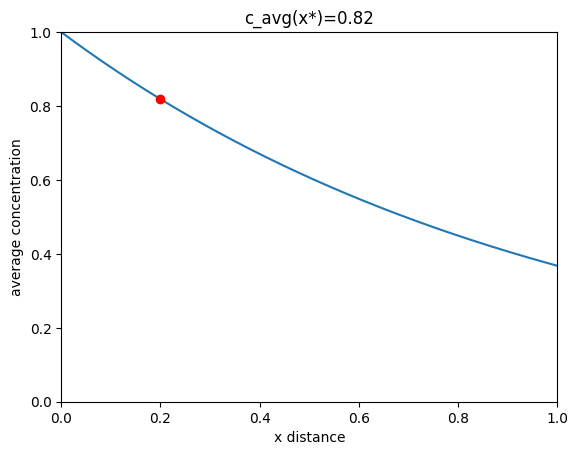

In [ ]:
xstar = 0.2 #x location of interest
ux = 1 #advective velocity
A = 1 #area of plane source
mdot = 1 #mass released per unit time
x0 = 0 #x location of release
nx = 1000 #number of spatial bins in x
Lx = 1 #total spatial extent in x (assuming x spatial vector starts at x=x0)
k = 1 #kinetic constant for first order reaction rate - set to zero if no reaction
R = 1 #retardation factor - set to one if no retardation

# Apply retardation factor
ux = ux/R
k = k/R

# Calculate the solution
x = (Lx/nx)*np.arange(nx)+x0 #x spatial vector
c_max = mdot/(ux*A)
rxn = np.exp(-k*(x-x0)/ux)
c = c_max*rxn

#find x_star index
xstari = np.argmin(np.absolute(x-x_star))

plt.plot(x,c)
plt.plot(xstar,c[xstari],'ro')
plt.xlim([x0,x0+L])
plt.ylim([0,c_max])
plt.xlabel('x distance')
plt.ylabel('average concentration')
plt.title('c_avg(x*)={:.2f}'.format(c[xstari]))

### Line Source

Gov. Eqn:

> $0 = -u_x \frac{dc}{dx} + D_y \frac{d^2c}{dy^2}-kc$

B.C.:

> $u_x c= \frac{\dot{m}}{h} \delta(y-y_0)$ at $x=x_0$

>> The left hand side is an advective mass flux. This B.C. states that there is a constant mass flux in the x-direction at $x=x_0, y=y_0$,  where $h$ is the height of the line and $\dot{m}$ is the release of mass per unit time.

> $\lim_{y\to-\infty} c$ = $\lim_{y\to\infty} c=0$

Solution:

> $\bar{c}(x,y) = \frac{\frac{\dot{m}}{u_x}}{h(4 \pi \frac{x}{u_x})^\frac{1}{2}\sqrt{D_y}}e^{(- \frac{u_x(y-y_0)^2}{4D_yx})}e^{\frac{-k(x-x_0)}{u_x}}$

NOTE: If sorption is occuring in porous media, replace
>$u_x$ with $\frac{u_x}{R}$

>$D_y$ with $\frac{D_y}{R}$

>$k$ with $\frac{k}{R}$

NOTE: If an [impermeable boundary](https://colab.research.google.com/drive/1m9I09YdunHc4ESm-nlStBkl-EpMUPNWn?usp=sharing) exists, replace the B.C. with a no flux boundary,

>$u_xc - D_x\frac{dc}{dx} = 0$ at x = boundary location

and add image sources to get the solution
>$c = c_{real} + \sum c_{image}$

NOTE: If a [perfectly sorbing boundary](https://colab.research.google.com/drive/1m9I09YdunHc4ESm-nlStBkl-EpMUPNWn?usp=sharing) exists, replace the B.C. with a zero concentration boundary,

>$c = 0$ at x = boundary location

and subtract image sources to get the solution
>$c = c_{real} - \sum c_{image}$

<ipython-input-2-0697e2d0abaa>:29: RuntimeWarning: divide by zero encountered in divide
  c_max = (mdot/ux)/(h*(4*np.pi*Dy*xx/ux)**(0.5))
<ipython-input-2-0697e2d0abaa>:31: RuntimeWarning: divide by zero encountered in divide
  c = c_max*np.exp(-ux*(yy-y0)**2/(4*Dy*xx))*rxn
<ipython-input-2-0697e2d0abaa>:31: RuntimeWarning: invalid value encountered in divide
  c = c_max*np.exp(-ux*(yy-y0)**2/(4*Dy*xx))*rxn
<ipython-input-2-0697e2d0abaa>:31: RuntimeWarning: invalid value encountered in multiply
  c = c_max*np.exp(-ux*(yy-y0)**2/(4*Dy*xx))*rxn


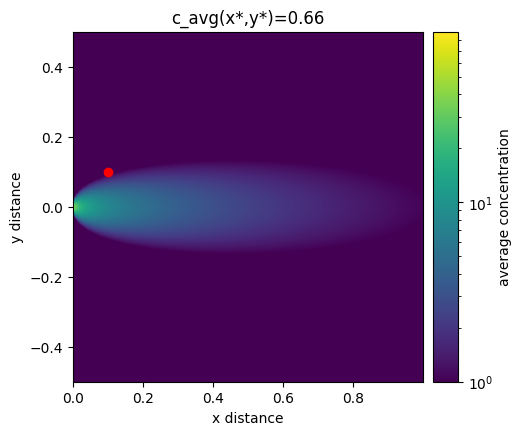

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

xstar = 0.1 #x location of interest
ystar = 0.1 #y location of interest
ux = 1 #advective velocity
h = 1 #height of line source
Dy = .01 #Diffusion/Dispersion coefficient in y
mdot = 1 #mass released per unit time
x0 = 0 #x location of release
y0 = 0 #y location of release
nx = 1000 #number of spatial bins in x
ny = 1000 #number of spatial bins in y
Lx = 1 #total spatial extent in x (assuming x spatial vector starts at x=x0)
Ly = 1 #total spatial extent in y (assuming y spatial vector starts at y=y0)
k = 1 #kinetic constant for first order reaction rate - set to zero if no reaction
R = 1 #retardation factor - set to one if no retardation

# Apply retardation factor
ux = ux/R
Dy = Dy/R
k = k/R

# Calculate the solution
x = (Lx/nx)*np.arange(nx)+x0 #x spatial vector
y = (Ly/ny)*np.arange(ny)-(Ly/2)+y0 #y spatial vector
xx, yy = np.meshgrid(x, y, indexing='ij')
c_max = (mdot/ux)/(h*(4*np.pi*Dy*xx/ux)**(0.5))
rxn = np.exp(-k*(xx-x0)/ux)
c = c_max*np.exp(-ux*(yy-y0)**2/(4*Dy*xx))*rxn

#find x_star and y_star index
xstari = np.argmin(np.absolute(x-xstar))
ystari = np.argmin(np.absolute(y-ystar))

# For log scale, plot all concentrations < 1 as 1
cplot = c.copy()
cplot[cplot<1]=1

fig, ax = plt.subplots(1, figsize=[5,5])
ax.set_position([0.1,0.1, 0.7, 0.7]) #location of plot
cax = plt.axes([0.82, 0.1, 0.05, 0.7]) #location of colorbar
im = ax.pcolor(xx,yy,cplot,norm=colors.LogNorm(vmin=1, vmax=np.nanmax(c)))
ax.plot(xstar,ystar,'ro')
ax.set_xlim([x0,x0+Lx])
ax.set_ylim([y0-Ly/2,y0+Ly/2])
ax.axis('equal')
ax.set_xlabel('x distance')
ax.set_ylabel('y distance')
ax.set_title('c_avg(x*,y*)={:.2f}'.format(c[xstari,ystari]))
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('average concentration')

### Point Source

Gov. Eqn:

> $0 = -u_x \frac{dc}{dx} + D_y \frac{d^2c}{dy^2} + D_z \frac{d^2c}{dz^2}-kc$

B.C.:

> $u_x c= \dot{m} \delta(y-y_0) \delta(z-z_0)$ at $x=x_0$

>> The left hand side is an advective mass flux. This B.C. states that there is a constant mass flux in the x-direction at $x=x_0, y=y_0, z=z_0$,  where $\dot{m}$ is the release of mass per unit time.

> $\lim_{y\to-\infty} c$ = $\lim_{y\to\infty} c=0$

> $\lim_{z\to-\infty} c$ = $\lim_{z\to\infty} c=0$

Solution:

> $\bar{c}(x,y,z) = \frac{\dot{m}}{(4 \pi x)\sqrt{D_y D_z}}e^{(- \frac{u_x(y-y_0)^2}{4D_yx} - \frac{u_x(z-z_0)^2}{4D_zx})}e^{\frac{-k(x-x_0)}{u_x}}$


NOTE: If sorption is occuring in porous media, replace
>$u_x$ with $\frac{u_x}{R}$

>$D_y$ with $\frac{D_y}{R}$

>$D_z$ with $\frac{D_z}{R}$

>$k$ with $\frac{k}{R}$

NOTE: If an [impermeable boundary](https://colab.research.google.com/drive/1m9I09YdunHc4ESm-nlStBkl-EpMUPNWn?usp=sharing) exists, replace the B.C. with a no flux boundary,

>$u_xc - D_x\frac{dc}{dx} = 0$ at x = boundary location

and add image sources to get the solution
>$c = c_{real} + \sum c_{image}$

NOTE: If a [perfectly sorbing boundary](https://colab.research.google.com/drive/1m9I09YdunHc4ESm-nlStBkl-EpMUPNWn?usp=sharing) exists, replace the B.C. with a zero concentration boundary,

>$c = 0$ at x = boundary location

and subtract image sources to get the solution
>$c = c_{real} - \sum c_{image}$

<ipython-input-39-4336ae55ba9f>:34: RuntimeWarning: divide by zero encountered in true_divide
  c_max = mdot/(4*np.pi*xx*(Dy*Dz)**(0.5))
<ipython-input-39-4336ae55ba9f>:36: RuntimeWarning: divide by zero encountered in true_divide
  c = c_max*np.exp(-ux*(yy-y0)**2/(4*Dy*xx) -ux*(zz-z0)**2/(4*Dz*xx))*rxn
<ipython-input-39-4336ae55ba9f>:36: RuntimeWarning: invalid value encountered in true_divide
  c = c_max*np.exp(-ux*(yy-y0)**2/(4*Dy*xx) -ux*(zz-z0)**2/(4*Dz*xx))*rxn
<ipython-input-39-4336ae55ba9f>:36: RuntimeWarning: invalid value encountered in multiply
  c = c_max*np.exp(-ux*(yy-y0)**2/(4*Dy*xx) -ux*(zz-z0)**2/(4*Dz*xx))*rxn


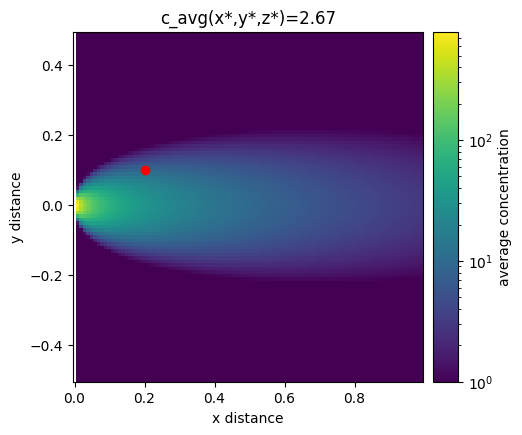

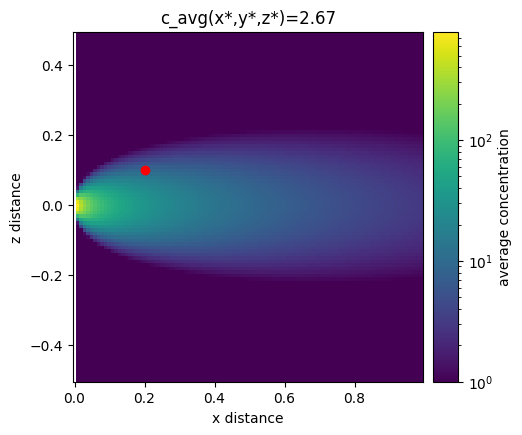

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

xstar = 0.2 #x location of interest
ystar = 0.1 #y location of interest
zstar = 0.1 #z location of interest
ux = 1 #advective velocity
Dy = .01 #Diffusion/Dispersion coefficient in x
Dz = .01 #Diffusion/Dispersion coefficient in y
mdot = 1 #mass released per unit time
x0 = 0 #x location of release
y0 = 0 #y location of release
z0 = 0 #z location of release
nx = 100 #number of spatial bins in x
ny = 100 #number of spatial bins in y
nz = 100 #number of spatial bins in z
Lx = 1 #total spatial extent in x (assuming x spatial vector starts at x=x0)
Ly = 1 #total spatial extent in y (assuming y spatial vector starts at y=y0)
Lz = 1 #total spatial extent in z (assuming z spatial vector starts at z=z0)
k = 1 #kinetic constant for first order reaction rate - set to zero if no reaction
R = 1 #retardation factor - set to one if no retardation

# Apply retardation factor
ux = ux/R
Dy = Dy/R
Dz = Dz/R
k = k/R

# Calculate the solution
x = (Lx/nx)*np.arange(nx)+x0 #x spatial vector
y = (Ly/ny)*np.arange(ny)-(Ly/2)+y0 #y spatial vector
z = (Lz/nz)*np.arange(nz)-(Lz/2)+z0 #y spatial vector
xx, yy, zz = np.meshgrid(x, y, z, indexing='ij')
c_max = mdot/(4*np.pi*xx*(Dy*Dz)**(0.5))
rxn = np.exp(-k*(xx-x0)/ux)
c = c_max*np.exp(-ux*(yy-y0)**2/(4*Dy*xx) -ux*(zz-z0)**2/(4*Dz*xx))*rxn

#find x_star and y_star index
xstari = np.argmin(np.absolute(x-xstar))
ystari = np.argmin(np.absolute(y-ystar))
zstari = np.argmin(np.absolute(y-ystar))

# For log scale, plot all concentrations < 1 as 1
cplot = c.copy()
cplot[cplot<1]=1

#find z0 index
zi = np.argmin(np.absolute(z-z0))
#find y0 index
yi = np.argmin(np.absolute(y-y0))

# Plan View
fig1, ax1 = plt.subplots(1, figsize=[5,5])
ax1.set_position([0.1,0.1, 0.7, 0.7]) #location of plot in figure
im1 = ax1.pcolor(xx[:,:,zi],yy[:,:,zi],cplot[:,:,zi],norm=colors.LogNorm(vmin=1, vmax=np.nanmax(c[1,yi,zi])))
ax1.plot(xstar,ystar,'ro')
ax1.set_xlim([x0,x0+Lx])
ax1.set_ylim([y0-Ly/2,y0+Ly/2])
ax1.axis('equal')
ax1.set_xlabel('x distance')
ax1.set_ylabel('y distance')
ax1.set_title('c_avg(x*,y*,z*)={:.2f}'.format(c[xstari,ystari,zstari]))
cax1 = plt.axes([0.82, 0.1, 0.05, 0.7]) #location of colorbar in figure
cbar1 = plt.colorbar(im1, cax=cax1)
cbar1.set_label('average concentration')

# Elevation View
fig2, ax2 = plt.subplots(1, figsize=[5,5])
ax2.set_position([0.1,0.1, 0.7, 0.7]) #location of plot in figure
cax2 = plt.axes([0.82, 0.1, 0.05, 0.7]) #location of colorbar in figure
im2 = ax2.pcolor(xx[:,yi,:],zz[:,yi,:],cplot[:,yi,:],norm=colors.LogNorm(vmin=1, vmax=np.nanmax(c[1,yi,zi])))
ax2.plot(xstar,zstar,'ro')
ax2.set_xlim([x0,x0+Lx])
ax2.set_ylim([z0-Lz/2,z0+Lz/2])
ax2.axis('equal')
ax2.set_xlabel('x distance')
ax2.set_ylabel('z distance')
ax2.set_title('c_avg(x*,y*,z*)={:.2f}'.format(c[xstari,ystari,zstari]))
cbar2 = plt.colorbar(im2, cax=cax2)
cbar2.set_label('average concentration')